<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>

# **HR Attrition**

In [1]:
# Importar - Bibliotecas Gerais
import pandas as pd
import seaborn as sns
import numpy as np

# Visualização
import matplotlib.pyplot as plt

# Pré-processamento
from sklearn.preprocessing import (
    MinMaxScaler,
    OrdinalEncoder,
    OneHotEncoder)

<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>
    
# **1. EDA - Exploratory Data Analysis** </font></a>


<a class="anchor" id="2nd-bullet">
<font color = '#2f4bd6ff'>
    
## **1.1. Importar os dados** </font></a>


Na secção 1.1 fazemos a importação da bases de dados "HR_Attrition_Dataset.csv"

In [2]:
df = pd.read_csv("HR_Attrition_Dataset.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.2 Caracterização inicial da base de dados** </font></a>

A base de dados apresenta uma dimensão de 1.470 linhas por 35 colunas, não tendo sido identificados registos duplicados. No que respeita à tipologia das variáveis, constatou-se que o dataset é composto por 35 variáveis, das quais 9 são categóricas e as 26 numéricas.

Sendo a variável target "Attrition"

In [3]:
df.shape

(1470, 35)

In [4]:
pd.DataFrame({
    'Non-Null Count': df.notnull().sum(),
    'Dtype': df.dtypes})

,Non-Null Count,Dtype
Age,1470,int64
Attrition,1470,object
BusinessTravel,1470,object
DailyRate,1470,int64
Department,1470,object
DistanceFromHome,1470,int64
Education,1470,int64
EducationField,1470,object
EmployeeCount,1470,int64
EmployeeNumber,1470,int64


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.3  Exploração basica do data frame e pre-processamento inicial** </font></a>

Procedeu-se a uma exploração inicial dos dados de treino com o objetivo de obter uma visão geral do conteúdo do dataset e identificar eventuais necessidades de pré-processamento. 
Esta etapa foi fundamental para compreender a estrutura dos dados, bem como para detetar incoerências, valores nulos ou duplicados que pudessem comprometer a qualidade da análise posterior.

In [5]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Analisar as estatisticas principais das variávieis nunéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
# Analisar as estatisticas principais das variávieis categóricas
df.describe(include=['object']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


'EmployeeCount' is always = 1 (std = 0) - remove

'StandardHours' is always = 80 (std = 0) - remove

'Over18' is always =1 - remove

In [34]:
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18']
df.drop(columns=cols_to_drop, inplace=True)
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Não foram detetados valores em falta

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Não há valores duplicados

In [10]:
# Variáveis Numércias
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Variáveis Categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [12]:
# Observar valores únicos 
# Lista de todas as colunas
columns = df.columns.tolist()

# Valores Únicos
for col in columns:
    unique_vals = df[col].unique()
    print(f"{col} → {unique_vals}")


Age → [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition → ['Yes' 'No']
BusinessTravel → ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate → [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2 Visual Exploration** </font></a>

| Category | Variables | Why They’re Useful |
|-----------|------------|--------------------|
| **Compensation** | MonthlyIncome, DailyRate, HourlyRate, PercentSalaryHike | Test if pay or raise differences impact attrition |
| **Career** | JobLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager | See if experience or promotion stagnation affects turnover |
| **Work patterns** | TrainingTimesLastYear, WorkLifeBalance, DistanceFromHome | See if lifestyle/work-life imbalance affects attrition |
| **Demographics** | Age, Education | Explore if certain age/education groups are more likely to leave |


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.1 Target Variable** </font></a>

,Nr of Employees,%
Attrition,,
No,1233,83.88 %
Yes,237,16.12 %


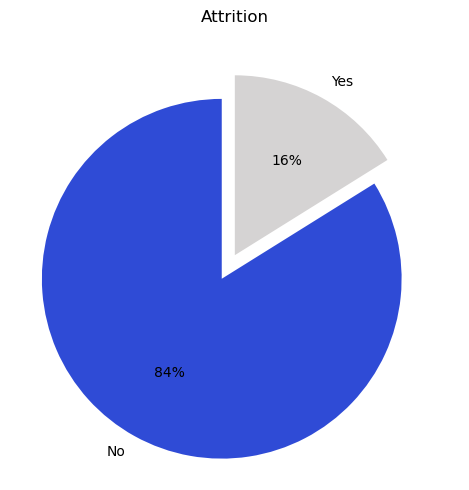

In [15]:
# Target Variable Distribution
a = df['Attrition'].value_counts().sort_index()
b = df['Attrition'].value_counts(normalize=True) * 100
b = b.map('{:,.2f} %'.format).sort_index()

# Proportions
df_temp = pd.concat([a,b],axis = 1)
df_temp.columns = ['Nr of Employees', '%']
display(df_temp)
Attrition_Employee = df.groupby(['Attrition'])['Attrition'].count()

# Create a pie chart 
Attrition_Employee.plot(kind='pie', labels = ['No', 'Yes'],subplots=True, figsize=(5, 5),explode = (0.15 , 0),startangle = 90,autopct = '%1.f%%', colors=["#2f4bd6ff", "#d5d3d3ff"])
plt.title("Attrition")
plt.ylabel('')
#tight_layout: adjusts subplot to fit in to the figure are
plt.tight_layout()
plt.show()



Employee Attrition:

    83.9% of employees stayed with the company.

    16.1% of employees left the company.

The dataset is imbalanced toward those who stayed.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.2 Categorical Variables** </font></a>

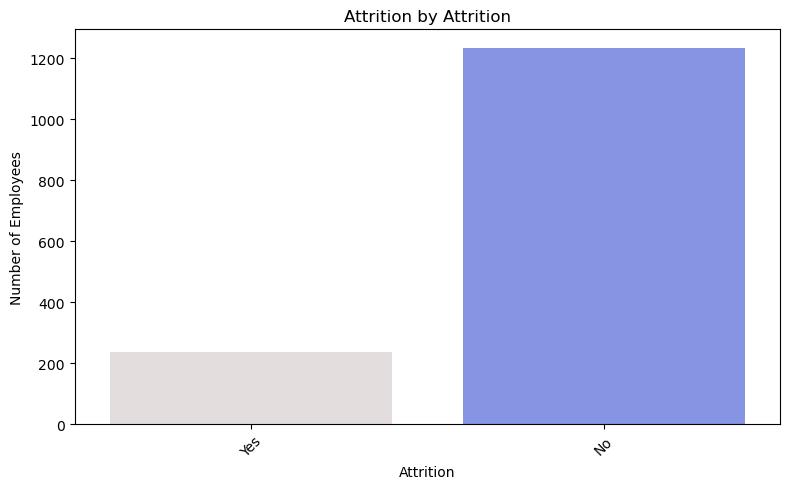

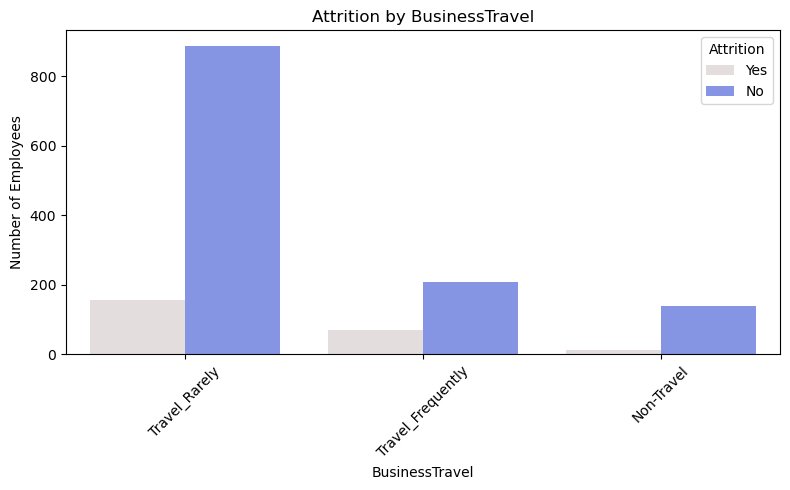

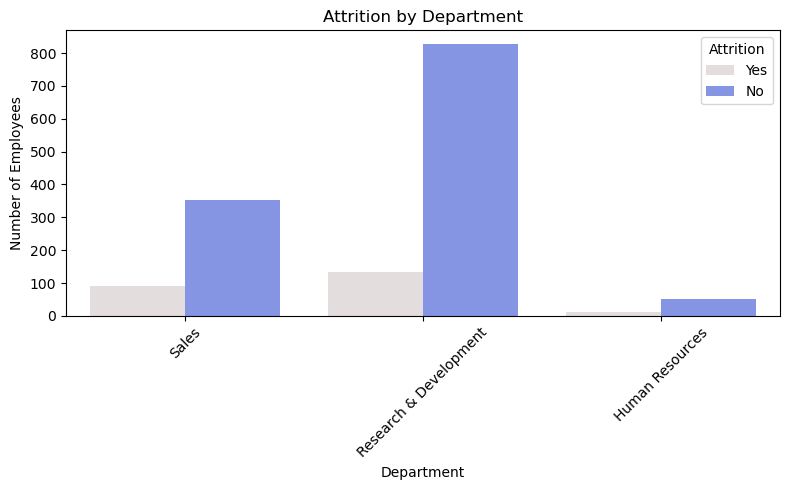

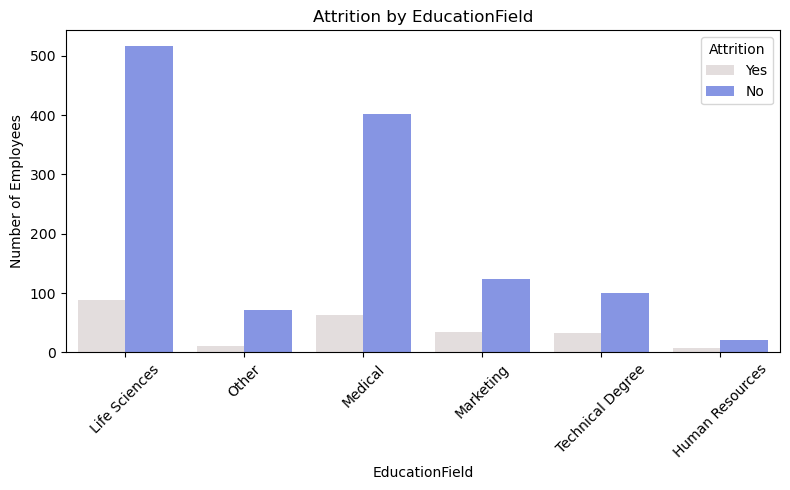

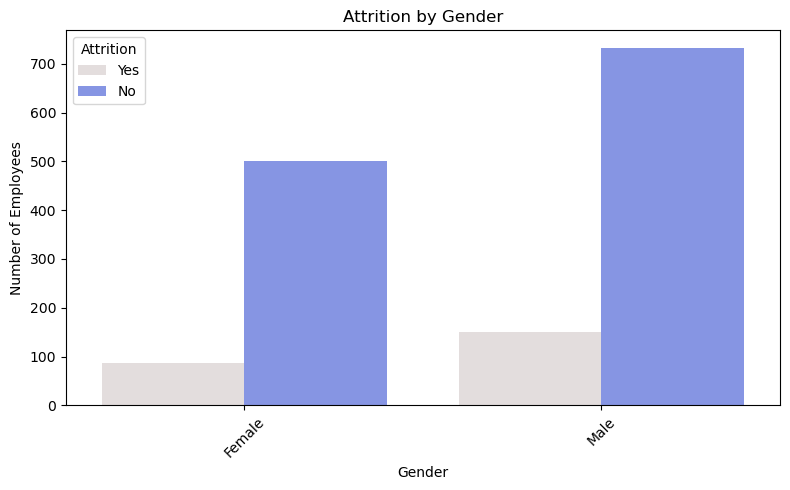

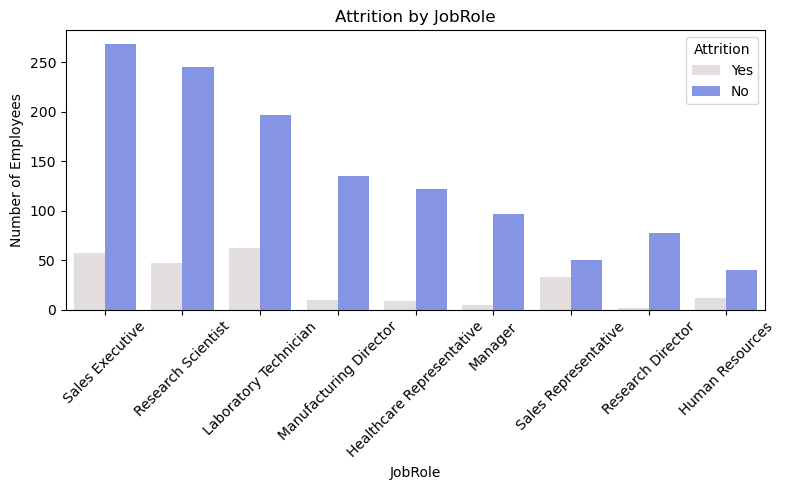

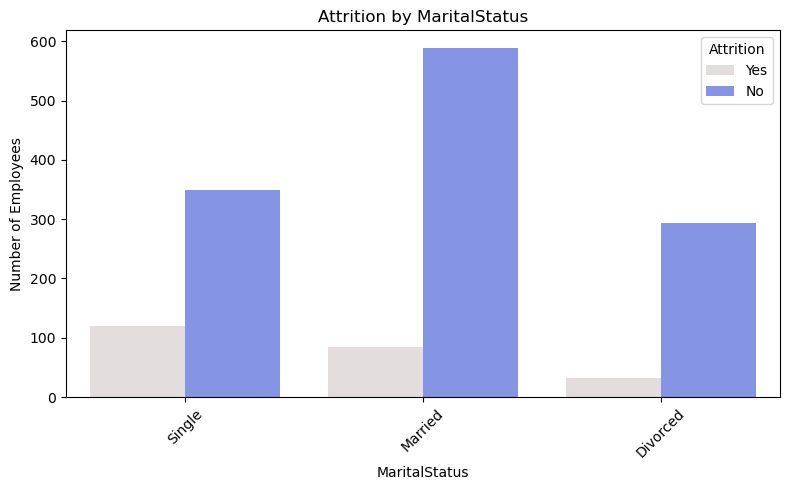

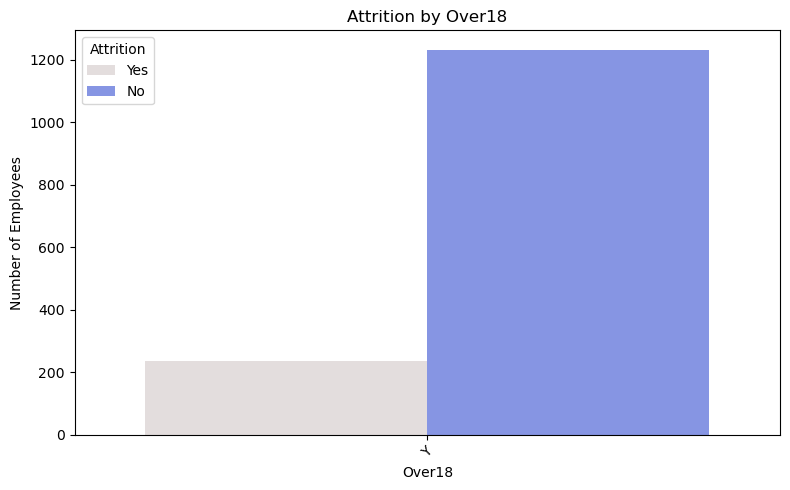

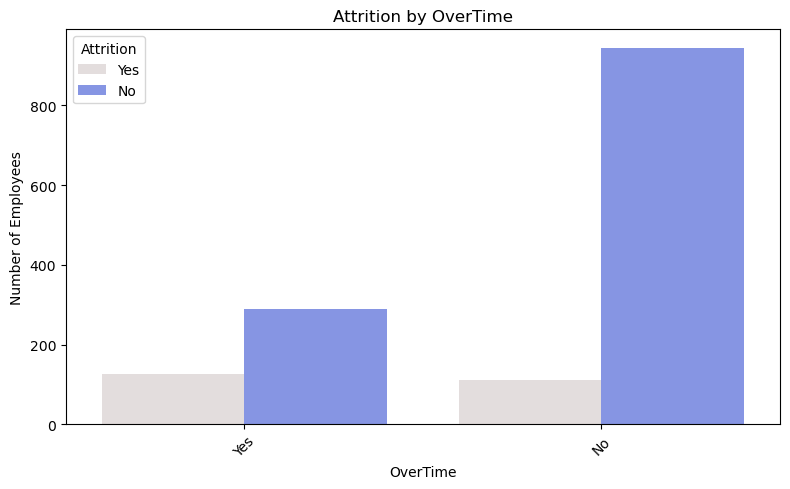

In [32]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue="Attrition", palette={"Yes": "#e4dcdcff", "No": "#778bf2ff"})
    plt.title(f"Attrition by {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Employees")
    plt.xticks(rotation=45)


    # Remove plt.legend() call
    plt.tight_layout()
    plt.show()


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.3 Numerical Variables** </font></a>

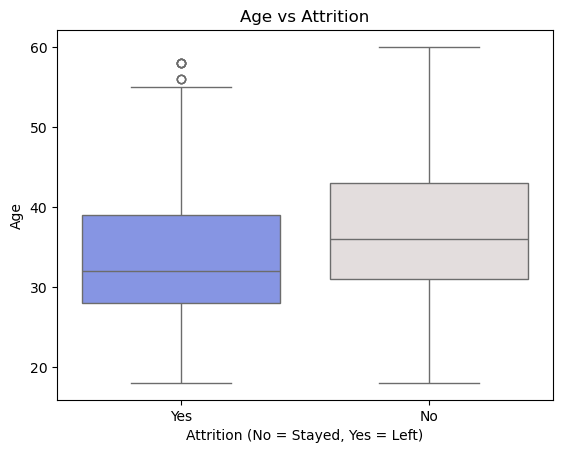

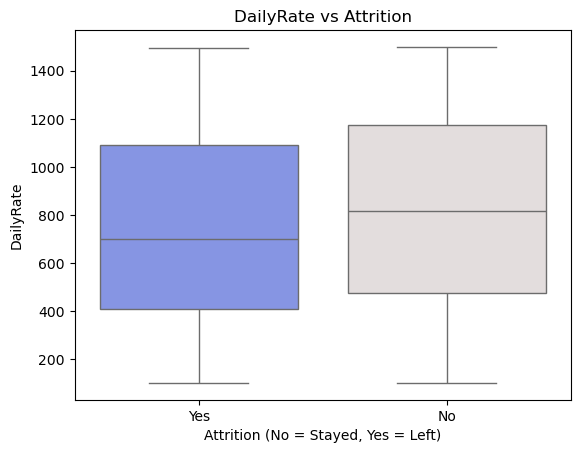

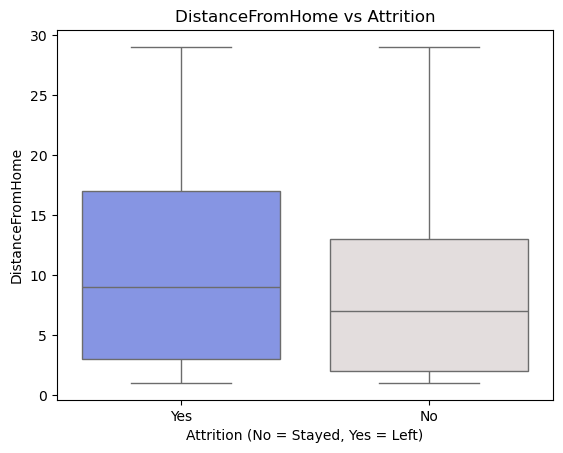

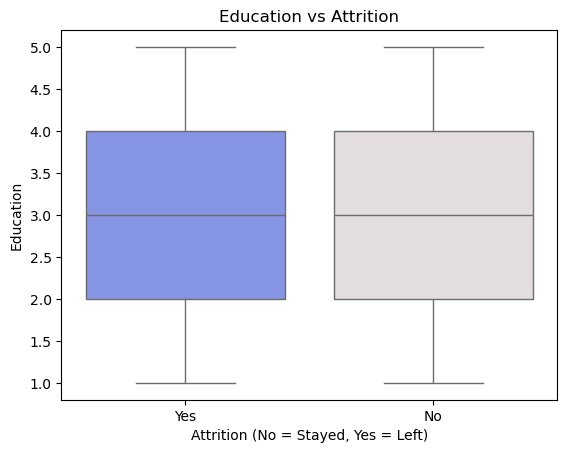

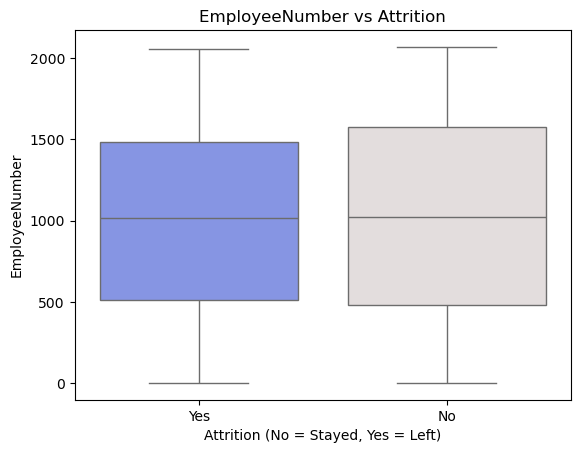

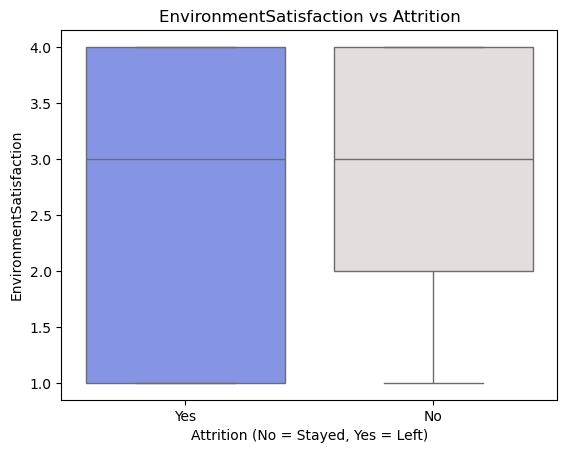

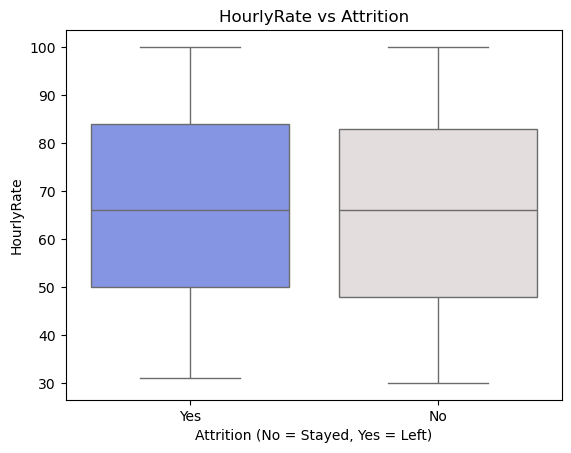

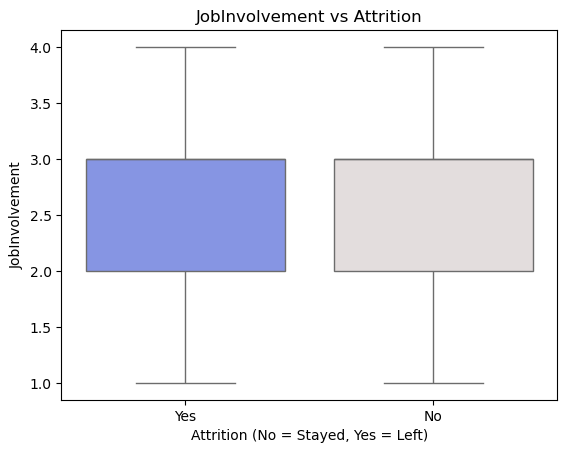

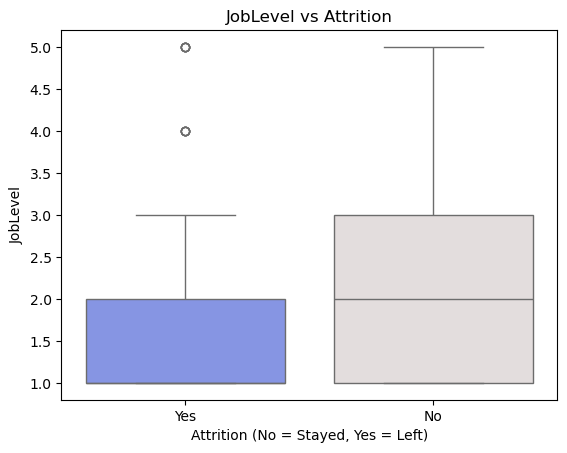

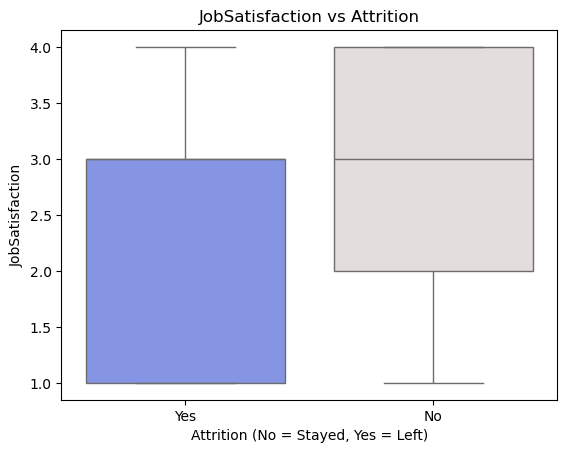

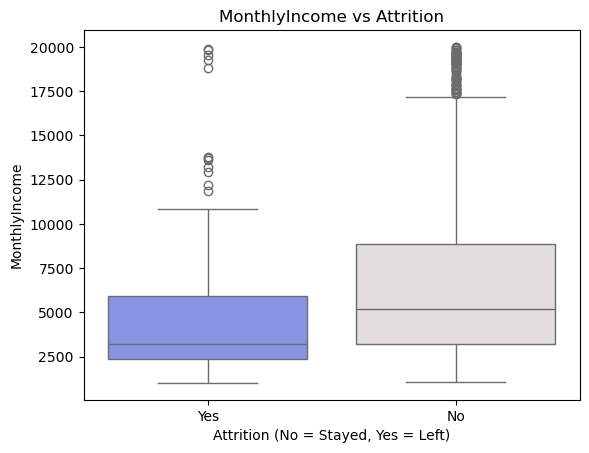

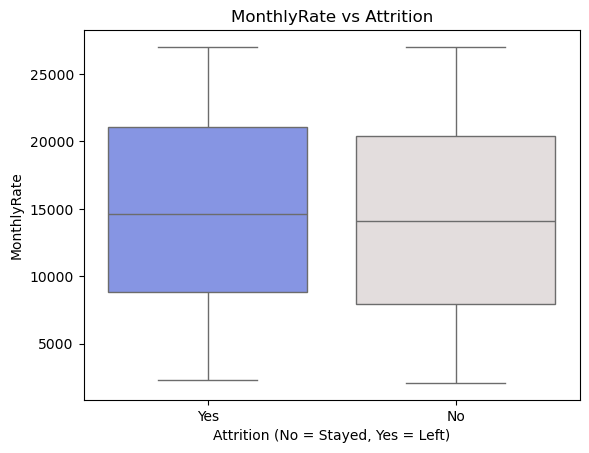

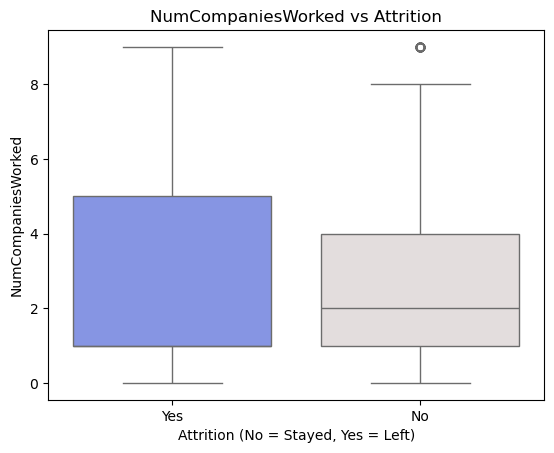

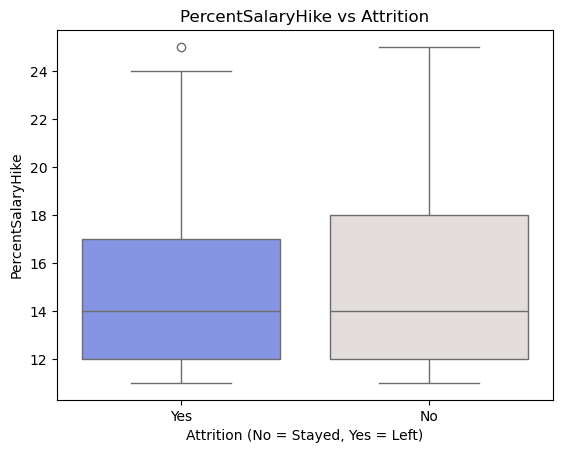

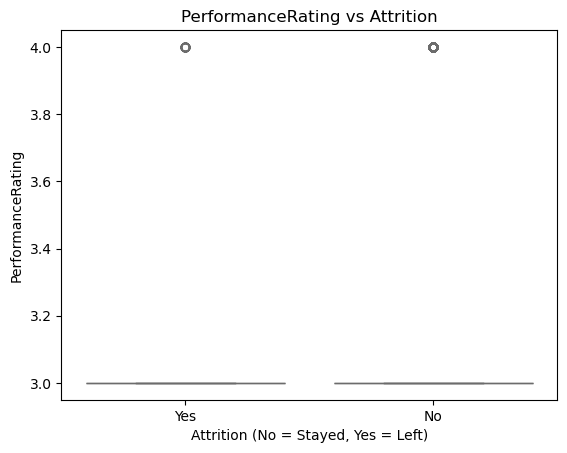

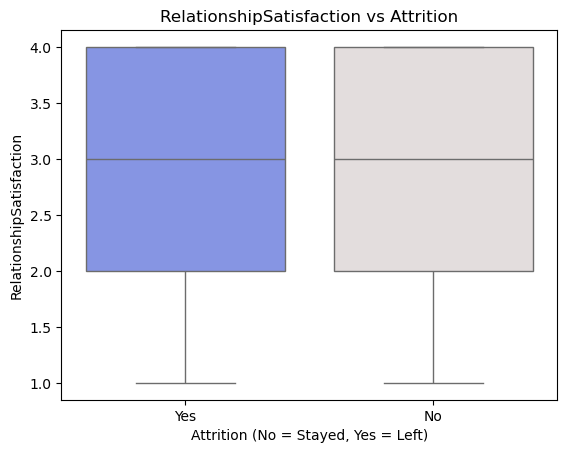

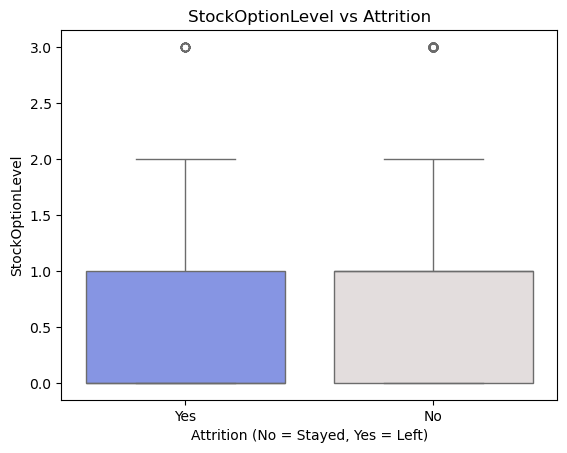

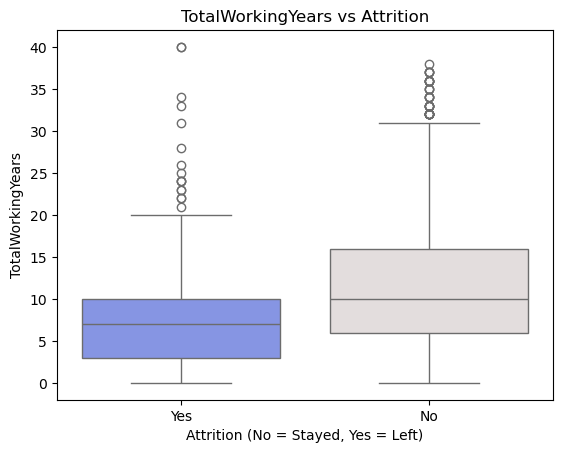

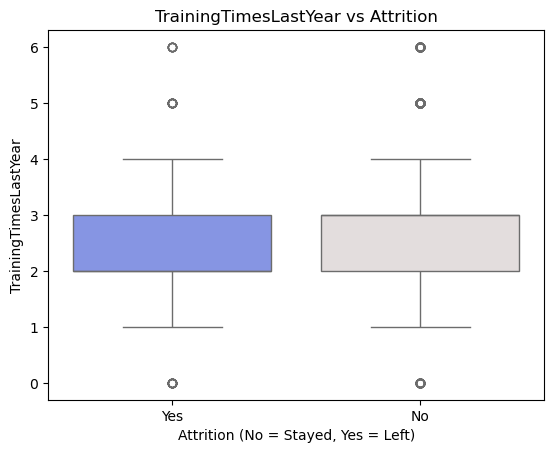

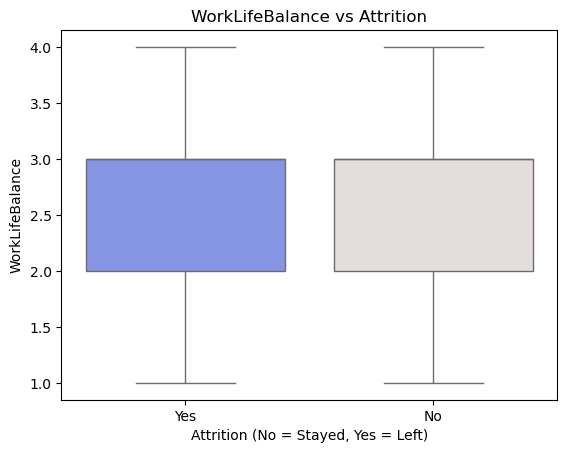

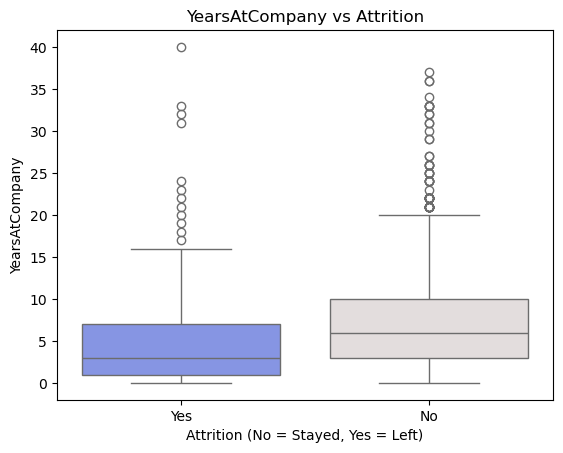

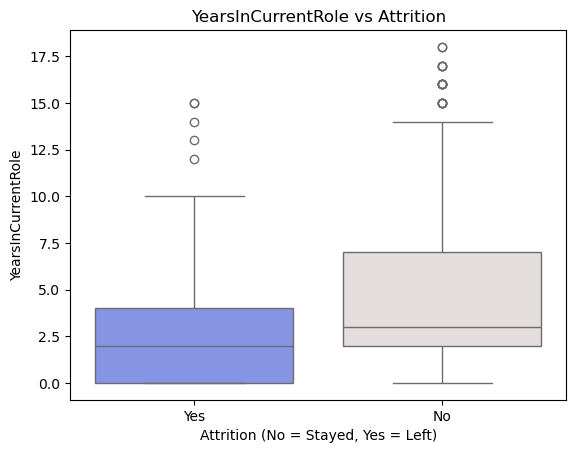

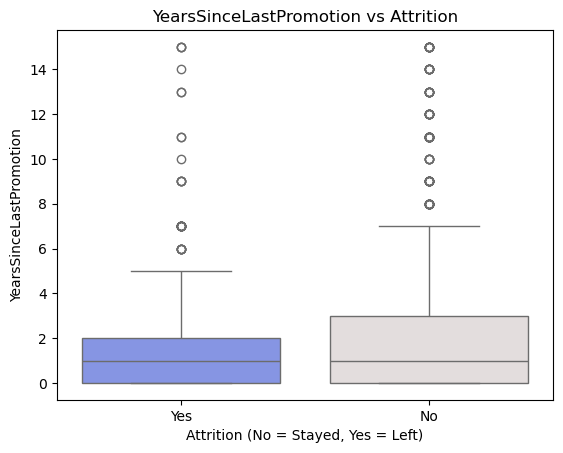

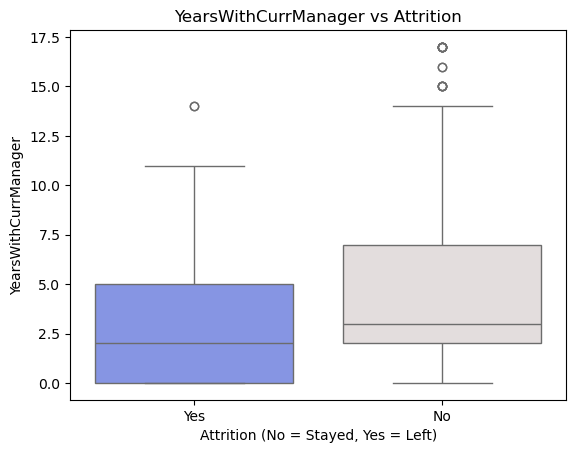

In [35]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=df, x="Attrition", y=col,hue="Attrition", palette=["#778bf2ff", "#e4dcdcff"])
    plt.title(f"{col} vs Attrition")
    plt.xlabel("Attrition (No = Stayed, Yes = Left)")
    plt.ylabel(col)
    plt.show()
  

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3. Data Transformation** </font></a>

In [ ]:
bool_map = {'Yes': 1, 'No': 0, True: 1, False: 0}
bool_cols = ['Attrition', 'OverTime'] 
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].map(bool_map)

#Variáveis categóricas ordinais
ordinal_maps = {
    'BusinessTravel': {'Non-Travel': 1, 'Travel_Frequently': 2, 'Travel_Rarely': 3},
    'Department': {'Human Resources': 1, 'Research & Development': 2, 'Sales': 3},
    'EducationField': {'Human Resources': 1, 'Life Sciences': 2, 'Marketing': 3, 'Medical': 4, 'Other': 5, 'Technical Degree': 6},
    'Gender': {'Female': 1, 'Male': 2},
    'JobRole': {'Healthcare Representative': 1, 'Human Resources': 2, 'Laboratory Technician': 3, 'Manager': 4, 'Manufacturing Director': 5, 'Research Director': 6, 'Research Scientist': 7, 'Sales Executive': 8, 'Sales Representative': 9},
    'MaritalStatus': {'Divorced': 1, 'Married': 2, 'Single': 3},
    'OverTime': {'No': 0, 'Yes': 1},
}
for col, mapping in ordinal_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# 3️⃣ Variáveis categóricas sem ordem → one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# remover já mapeadas
categorical_cols = [col for col in categorical_cols if col not in ordinal_maps.keys()]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,...,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,...,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,...,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,...,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.0,0.5,0.559771,0.5,0.785714,0.25,0.6,0.0,0.996613,...,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.0,1.0,0.365784,0.5,0.178571,0.00,0.6,0.0,0.997097,...,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.0,1.0,0.037938,0.5,0.107143,0.50,0.2,0.0,0.998065,...,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.0,0.5,0.659270,1.0,0.035714,0.50,0.6,0.0,0.998549,...,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588
